In [16]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
# API key
api_key = '0HGOXU7CQ5P97A05'  # Replace with your actual API key
base_url = 'https://www.alphavantage.co/query?'

In [3]:
# API request URLS
url_xlk = (f"{base_url}function=TIME_SERIES_DAILY&symbol=XLK&outputsize=full&extended_hours=false&apikey={api_key}&datatype=csv")
url_xlv = (f"{base_url}function=TIME_SERIES_DAILY&symbol=XLV&outputsize=full&extended_hours=false&apikey={api_key}&datatype=csv")
url_xle = (f"{base_url}function=TIME_SERIES_DAILY&symbol=XLE&outputsize=full&extended_hours=false&apikey={api_key}&datatype=csv")
url_xlf = (f"{base_url}function=TIME_SERIES_DAILY&symbol=XLF&outputsize=full&extended_hours=false&apikey={api_key}&datatype=csv")

In [4]:
# Get the data from the API
response = requests.get(url_xlk)

# Save the CSV data to a DataFrame
with open('xlk_data.csv', 'wb') as file:
    file.write(response.content)

xlk_data = pd.read_csv('xlk_data.csv')

# Display the first few rows of the data
print(xlk_data.head())

    timestamp    open      high       low   close   volume
0  2024-10-24  229.57  229.6672  227.7600  229.15  2405995
1  2024-10-23  230.89  231.2400  226.4817  228.43  3041820
2  2024-10-22  230.76  232.5400  230.1000  231.75  3084585
3  2024-10-21  230.19  232.0200  229.7700  231.99  3161192
4  2024-10-18  231.29  231.7600  230.4200  230.91  2268528


In [5]:
# Function to fetch and save data
def save_data(url, symbol):
    response = requests.get(url)
    
    # Save the CSV content to a file
    with open(f'{symbol}_data.csv', 'wb') as file:
        file.write(response.content)
    
    # Load the data into a DataFrame
    data = pd.read_csv(f'{symbol}_data.csv')
    
    # Convert 'timestamp' to datetime format
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    
    # Filter the data for the date range 2017 to end of 2023
    filtered_data = data[(data['timestamp'] >= '2017-01-01') & (data['timestamp'] <= '2023-12-31')]
    
    # Save the filtered data to a new CSV file
    filtered_data.to_csv(f'{symbol}_data_2017_2023.csv', index=False)
    
    print(f'{symbol} data saved to CSV: {symbol}_data_2017_2023.csv')



In [6]:
# Fetch and save data for each sector
save_data(url_xlk, 'XLK')
save_data(url_xlv, 'XLV')
save_data(url_xle, 'XLE')
save_data(url_xlf, 'XLF')

XLK data saved to CSV: XLK_data_2017_2023.csv
XLV data saved to CSV: XLV_data_2017_2023.csv
XLE data saved to CSV: XLE_data_2017_2023.csv
XLF data saved to CSV: XLF_data_2017_2023.csv


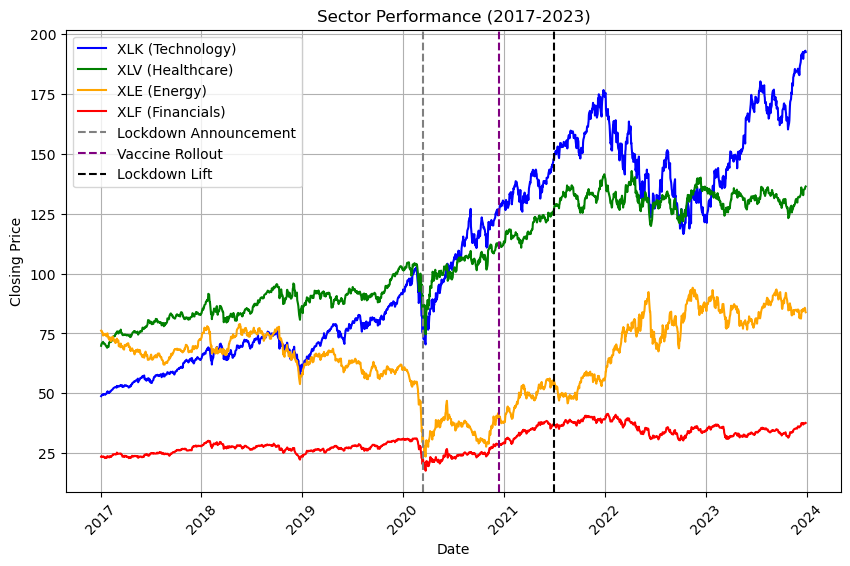

In [7]:
# Load data for all four sectors
xlk_data = pd.read_csv('XLK_data_2017_2023.csv')
xlv_data = pd.read_csv('XLV_data_2017_2023.csv')
xle_data = pd.read_csv('XLE_data_2017_2023.csv')
xlf_data = pd.read_csv('XLF_data_2017_2023.csv')

# Ensure 'timestamp' is a datetime object for all data
xlk_data['timestamp'] = pd.to_datetime(xlk_data['timestamp'])
xlv_data['timestamp'] = pd.to_datetime(xlv_data['timestamp'])
xle_data['timestamp'] = pd.to_datetime(xle_data['timestamp'])
xlf_data['timestamp'] = pd.to_datetime(xlf_data['timestamp'])

# Step 2: Plot the closing price for each sector
plt.figure(figsize=(10, 6))

plt.plot(xlk_data['timestamp'], xlk_data['close'], label='XLK (Technology)', color='blue')
plt.plot(xlv_data['timestamp'], xlv_data['close'], label='XLV (Healthcare)', color='green')
plt.plot(xle_data['timestamp'], xle_data['close'], label='XLE (Energy)', color='orange')
plt.plot(xlf_data['timestamp'], xlf_data['close'], label='XLF (Financials)', color='red')

# Step 3: Add annotations
# Lockdown announcement (March 2020)
plt.axvline(x=pd.to_datetime('2020-03-15'), color='gray', linestyle='--', label='Lockdown Announcement')
plt.text(pd.to_datetime('2020-03-15'), max(xlk_data['close']), ' ', color='gray')

# Vaccine rollout (December 2020)
plt.axvline(x=pd.to_datetime('2020-12-15'), color='purple', linestyle='--', label='Vaccine Rollout')
plt.text(pd.to_datetime('2020-12-15'), max(xlk_data['close']) * 0.9, ' ', color='purple')

# Lockdown lift (July 2021)
plt.axvline(x=pd.to_datetime('2021-07-01'), color='black', linestyle='--', label='Lockdown Lift')
plt.text(pd.to_datetime('2021-07-01'), max(xlk_data['close']) * 0.8, ' ', color='black')

# Step 4: Customize the plot
plt.title('Sector Performance (2017-2023)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Display the plot
plt.show()




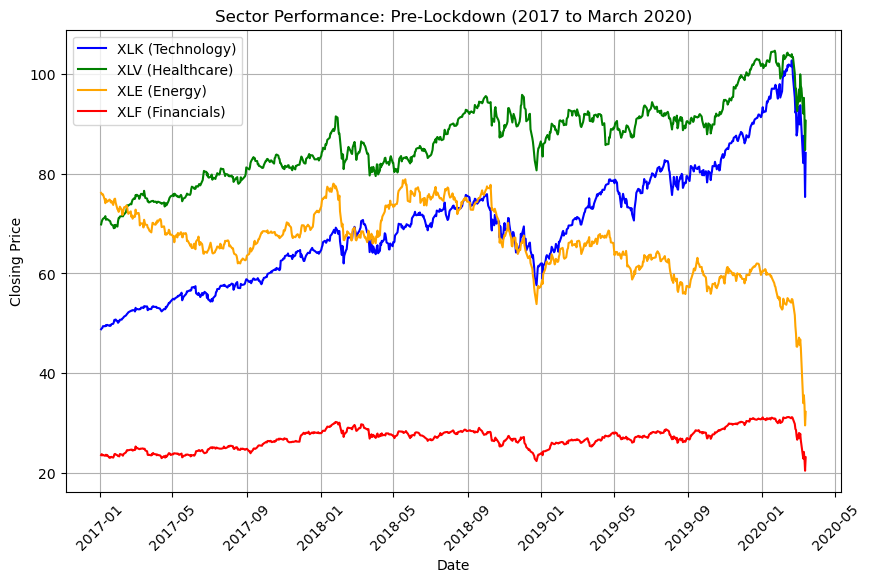

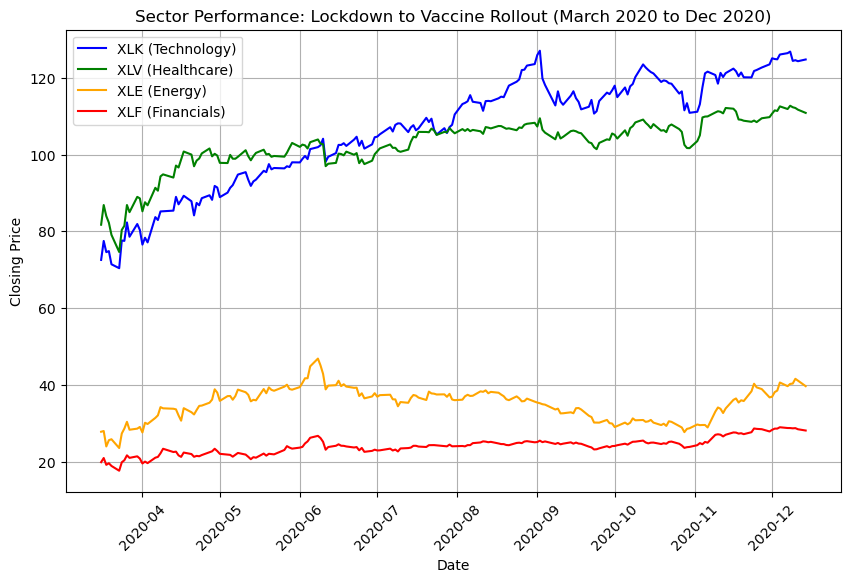

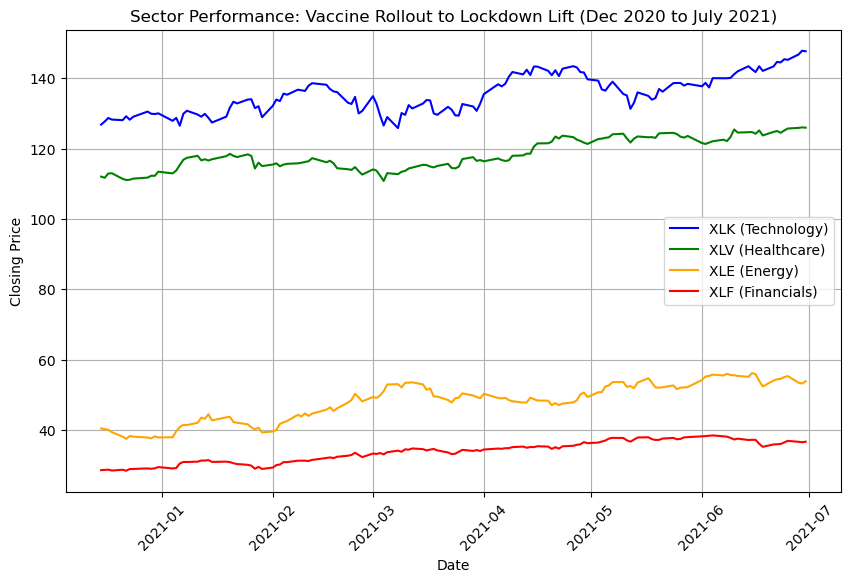

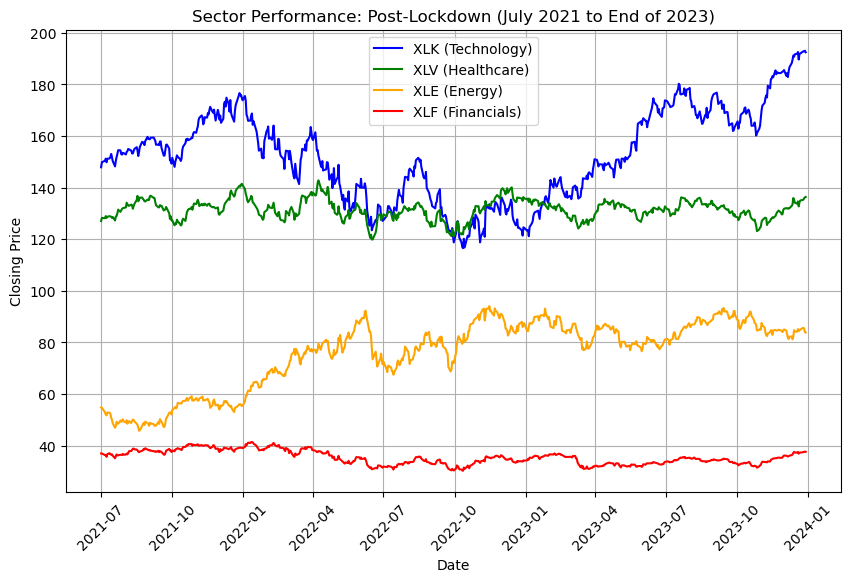

In [8]:
# Load data for all four sectors
xlk_data = pd.read_csv('XLK_data_2017_2023.csv')
xlv_data = pd.read_csv('XLV_data_2017_2023.csv')
xle_data = pd.read_csv('XLE_data_2017_2023.csv')
xlf_data = pd.read_csv('XLF_data_2017_2023.csv')

# Ensure 'timestamp' is a datetime object for all data
xlk_data['timestamp'] = pd.to_datetime(xlk_data['timestamp'])
xlv_data['timestamp'] = pd.to_datetime(xlv_data['timestamp'])
xle_data['timestamp'] = pd.to_datetime(xle_data['timestamp'])
xlf_data['timestamp'] = pd.to_datetime(xlf_data['timestamp'])

# Define the date ranges for the different periods
pre_lockdown = (xlk_data['timestamp'] < '2020-03-15')
lockdown_to_vaccine = (xlk_data['timestamp'] >= '2020-03-15') & (xlk_data['timestamp'] < '2020-12-15')
vaccine_to_lockdown_lift = (xlk_data['timestamp'] >= '2020-12-15') & (xlk_data['timestamp'] < '2021-07-01')
post_lockdown = (xlk_data['timestamp'] >= '2021-07-01')

# Function to plot a line chart for a specific time period
def plot_sector_performance(title, data_filter):
    plt.figure(figsize=(10, 6))
    
    plt.plot(xlk_data[data_filter]['timestamp'], xlk_data[data_filter]['close'], label='XLK (Technology)', color='blue')
    plt.plot(xlv_data[data_filter]['timestamp'], xlv_data[data_filter]['close'], label='XLV (Healthcare)', color='green')
    plt.plot(xle_data[data_filter]['timestamp'], xle_data[data_filter]['close'], label='XLE (Energy)', color='orange')
    plt.plot(xlf_data[data_filter]['timestamp'], xlf_data[data_filter]['close'], label='XLF (Financials)', color='red')
    
    plt.title(f'Sector Performance: {title}')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    
    plt.show()

# Plot each time period
plot_sector_performance('Pre-Lockdown (2017 to March 2020)', pre_lockdown)
plot_sector_performance('Lockdown to Vaccine Rollout (March 2020 to Dec 2020)', lockdown_to_vaccine)
plot_sector_performance('Vaccine Rollout to Lockdown Lift (Dec 2020 to July 2021)', vaccine_to_lockdown_lift)
plot_sector_performance('Post-Lockdown (July 2021 to End of 2023)', post_lockdown)


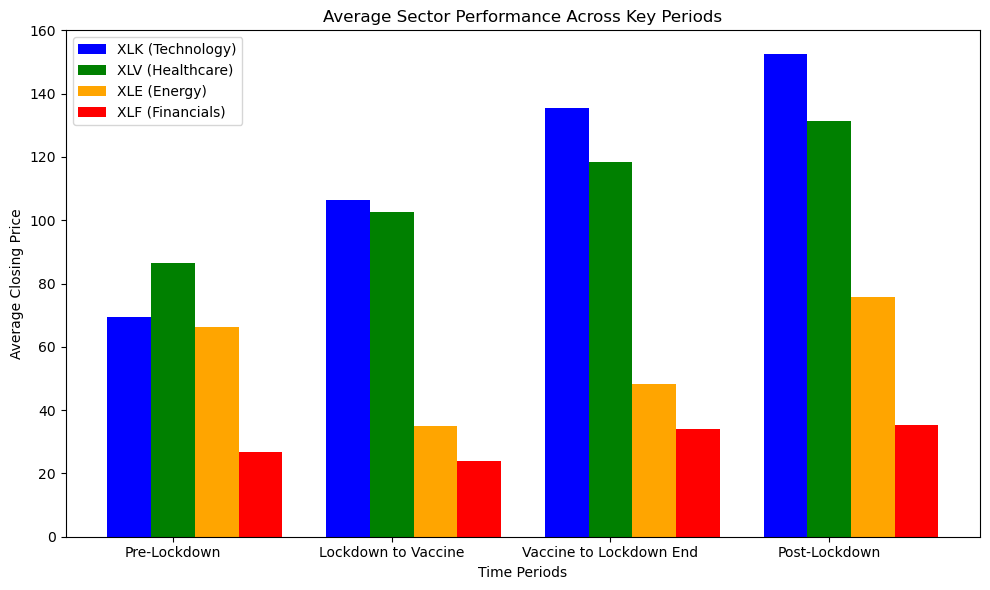

In [9]:
# Load data for all four sectors
xlk_data = pd.read_csv('XLK_data_2017_2023.csv')
xlv_data = pd.read_csv('XLV_data_2017_2023.csv')
xle_data = pd.read_csv('XLE_data_2017_2023.csv')
xlf_data = pd.read_csv('XLF_data_2017_2023.csv')

# Ensure 'timestamp' is a datetime object for all data
xlk_data['timestamp'] = pd.to_datetime(xlk_data['timestamp'])
xlv_data['timestamp'] = pd.to_datetime(xlv_data['timestamp'])
xle_data['timestamp'] = pd.to_datetime(xle_data['timestamp'])
xlf_data['timestamp'] = pd.to_datetime(xlf_data['timestamp'])

# Define the date ranges
pre_lockdown = (xlk_data['timestamp'] < '2020-03-15')
lockdown_to_vaccine = (xlk_data['timestamp'] >= '2020-03-15') & (xlk_data['timestamp'] < '2020-12-15')
vaccine_to_lockdown_end = (xlk_data['timestamp'] >= '2020-12-15') & (xlk_data['timestamp'] < '2021-07-01')
post_lockdown = (xlk_data['timestamp'] >= '2021-07-01')

# Function to calculate average closing prices for different time periods
def calculate_averages(data):
    return [
        data[pre_lockdown]['close'].mean(),
        data[lockdown_to_vaccine]['close'].mean(),
        data[vaccine_to_lockdown_end]['close'].mean(),
        data[post_lockdown]['close'].mean()
    ]

# Calculate averages for each sector
xlk_avg = calculate_averages(xlk_data)
xlv_avg = calculate_averages(xlv_data)
xle_avg = calculate_averages(xle_data)
xlf_avg = calculate_averages(xlf_data)

# Labels and bar width
labels = ['Pre-Lockdown', 'Lockdown to Vaccine', 'Vaccine to Lockdown End', 'Post-Lockdown']
bar_width = 0.2
index = range(len(labels))

# Plotting the grouped bar chart
plt.figure(figsize=(10, 6))

# Plot each sector's bars side by side
plt.bar([i - bar_width for i in index], xlk_avg, bar_width, label='XLK (Technology)', color='blue')
plt.bar(index, xlv_avg, bar_width, label='XLV (Healthcare)', color='green')
plt.bar([i + bar_width for i in index], xle_avg, bar_width, label='XLE (Energy)', color='orange')
plt.bar([i + 2 * bar_width for i in index], xlf_avg, bar_width, label='XLF (Financials)', color='red')

# Customize the plot
plt.xlabel('Time Periods')
plt.ylabel('Average Closing Price')
plt.title('Average Sector Performance Across Key Periods')
plt.xticks(index, labels)
plt.legend()

# Display the chart
plt.tight_layout()
plt.show()


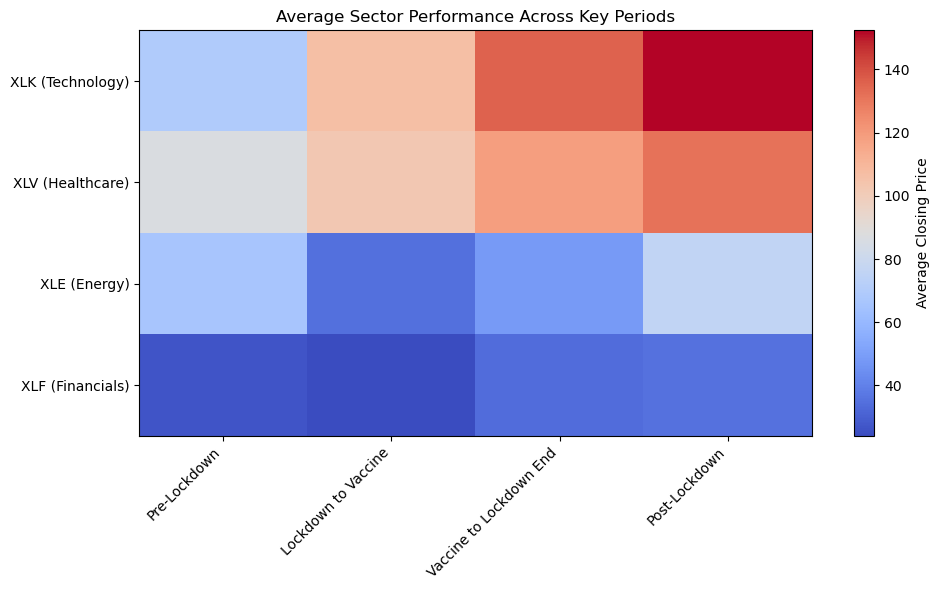

In [10]:
# Load data for all four sectors
xlk_data = pd.read_csv('XLK_data_2017_2023.csv')
xlv_data = pd.read_csv('XLV_data_2017_2023.csv')
xle_data = pd.read_csv('XLE_data_2017_2023.csv')
xlf_data = pd.read_csv('XLF_data_2017_2023.csv')

# Ensure 'timestamp' is a datetime object for all data
xlk_data['timestamp'] = pd.to_datetime(xlk_data['timestamp'])
xlv_data['timestamp'] = pd.to_datetime(xlv_data['timestamp'])
xle_data['timestamp'] = pd.to_datetime(xle_data['timestamp'])
xlf_data['timestamp'] = pd.to_datetime(xlf_data['timestamp'])

# Define the date ranges for periods
pre_lockdown = (xlk_data['timestamp'] < '2020-03-15')
lockdown_to_vaccine = (xlk_data['timestamp'] >= '2020-03-15') & (xlk_data['timestamp'] < '2020-12-15')
vaccine_to_lockdown_end = (xlk_data['timestamp'] >= '2020-12-15') & (xlk_data['timestamp'] < '2021-07-01')
post_lockdown = (xlk_data['timestamp'] >= '2021-07-01')

# Function to calculate average closing prices for different time periods
def averages(data):
    return [
        data[pre_lockdown]['close'].mean(),
        data[lockdown_to_vaccine]['close'].mean(),
        data[vaccine_to_lockdown_end]['close'].mean(),
        data[post_lockdown]['close'].mean()
    ]

# Calculate averages for each sector
xlk_avg = averages(xlk_data)
xlv_avg = averages(xlv_data)
xle_avg = averages(xle_data)
xlf_avg = averages(xlf_data)

# Create a matrix for the heatmap data
heatmap_data = np.array([xlk_avg, xlv_avg, xle_avg, xlf_avg])

# Create the heatmap
plt.figure(figsize=(10, 6))  # Increase figure size to give more space
plt.imshow(heatmap_data, cmap='coolwarm', aspect='auto')

# Add color bar to indicate scale
plt.colorbar(label='Average Closing Price')

# Define the x-axis and y-axis labels
plt.xticks(ticks=[0, 1, 2, 3], labels=['Pre-Lockdown', 'Lockdown to Vaccine', 'Vaccine to Lockdown End', 'Post-Lockdown'], rotation=45, ha='right')
plt.yticks(ticks=[0, 1, 2, 3], labels=['XLK (Technology)', 'XLV (Healthcare)', 'XLE (Energy)', 'XLF (Financials)'])

# Add a title
plt.title('Average Sector Performance Across Key Periods')

# Adjust layout to avoid label cutoff
plt.tight_layout()

# Display the plot
plt.show()


ANALYSIS

descriptive statistics (mean, median, std deviation, etc.)

In [11]:
# Load the CSV files
xlk_data = pd.read_csv('XLK_data_2017_2023.csv')
xlv_data = pd.read_csv('XLV_data_2017_2023.csv')
xle_data = pd.read_csv('XLE_data_2017_2023.csv')
xlf_data = pd.read_csv('XLF_data_2017_2023.csv')

# Ensure 'timestamp' is a datetime object for all data
xlk_data['timestamp'] = pd.to_datetime(xlk_data['timestamp'])
xlv_data['timestamp'] = pd.to_datetime(xlv_data['timestamp'])
xle_data['timestamp'] = pd.to_datetime(xle_data['timestamp'])
xlf_data['timestamp'] = pd.to_datetime(xlf_data['timestamp'])

# Calculate daily returns (percentage change)
xlk_data['returns'] = xlk_data['close'].pct_change()
xlv_data['returns'] = xlv_data['close'].pct_change()
xle_data['returns'] = xle_data['close'].pct_change()
xlf_data['returns'] = xlf_data['close'].pct_change()

# Save the updated data back to the CSV files
xlk_data.to_csv('XLK_data_2017_2023_with_returns.csv', index=False)
xlv_data.to_csv('XLV_data_2017_2023_with_returns.csv', index=False)
xle_data.to_csv('XLE_data_2017_2023_with_returns.csv', index=False)
xlf_data.to_csv('XLF_data_2017_2023_with_returns.csv', index=False)

In [12]:
# Load data for all four sectors
xlk_data = pd.read_csv('XLK_data_2017_2023.csv')
xlv_data = pd.read_csv('XLV_data_2017_2023.csv')
xle_data = pd.read_csv('XLE_data_2017_2023.csv')
xlf_data = pd.read_csv('XLF_data_2017_2023.csv')

# Ensure 'timestamp' is a datetime object for all data
xlk_data['timestamp'] = pd.to_datetime(xlk_data['timestamp'])
xlv_data['timestamp'] = pd.to_datetime(xlv_data['timestamp'])
xle_data['timestamp'] = pd.to_datetime(xle_data['timestamp'])
xlf_data['timestamp'] = pd.to_datetime(xlf_data['timestamp'])

# Calculate daily returns (percentage change)
xlk_data['returns'] = xlk_data['close'].pct_change()
xlv_data['returns'] = xlv_data['close'].pct_change()
xle_data['returns'] = xle_data['close'].pct_change()
xlf_data['returns'] = xlf_data['close'].pct_change()

# Define the date ranges for the different periods
pre_lockdown = (xlk_data['timestamp'] < '2020-03-15')
lockdown_to_vaccine = (xlk_data['timestamp'] >= '2020-03-15') & (xlk_data['timestamp'] < '2020-12-15')
vaccine_to_lockdown_lift = (xlk_data['timestamp'] >= '2020-12-15') & (xlk_data['timestamp'] < '2021-07-01')
post_lockdown = (xlk_data['timestamp'] >= '2021-07-01')

# Prepare the data for ANOVA by collecting returns for each period
xlk_pre = xlk_data[pre_lockdown]['returns'].dropna()
xlk_lockdown = xlk_data[lockdown_to_vaccine]['returns'].dropna()
xlk_vaccine = xlk_data[vaccine_to_lockdown_lift]['returns'].dropna()
xlk_post = xlk_data[post_lockdown]['returns'].dropna()

xlv_pre = xlv_data[pre_lockdown]['returns'].dropna()
xlv_lockdown = xlv_data[lockdown_to_vaccine]['returns'].dropna()
xlv_vaccine = xlv_data[vaccine_to_lockdown_lift]['returns'].dropna()
xlv_post = xlv_data[post_lockdown]['returns'].dropna()

xle_pre = xle_data[pre_lockdown]['returns'].dropna()
xle_lockdown = xle_data[lockdown_to_vaccine]['returns'].dropna()
xle_vaccine = xle_data[vaccine_to_lockdown_lift]['returns'].dropna()
xle_post = xle_data[post_lockdown]['returns'].dropna()

xlf_pre = xlf_data[pre_lockdown]['returns'].dropna()
xlf_lockdown = xlf_data[lockdown_to_vaccine]['returns'].dropna()
xlf_vaccine = xlf_data[vaccine_to_lockdown_lift]['returns'].dropna()
xlf_post = xlf_data[post_lockdown]['returns'].dropna()

# Perform one-way ANOVA across the four periods for each sector
# You can use stats.f_oneway for each sector across the four periods

print("ANOVA for XLK (Technology):")
f_value_xlk, p_value_xlk = stats.f_oneway(xlk_pre, xlk_lockdown, xlk_vaccine, xlk_post)
print(f"F-statistic: {f_value_xlk}, p-value: {p_value_xlk}")

print("\nANOVA for XLV (Healthcare):")
f_value_xlv, p_value_xlv = stats.f_oneway(xlv_pre, xlv_lockdown, xlv_vaccine, xlv_post)
print(f"F-statistic: {f_value_xlv}, p-value: {p_value_xlv}")

print("\nANOVA for XLE (Energy):")
f_value_xle, p_value_xle = stats.f_oneway(xle_pre, xle_lockdown, xle_vaccine, xle_post)
print(f"F-statistic: {f_value_xle}, p-value: {p_value_xle}")

print("\nANOVA for XLF (Financials):")
f_value_xlf, p_value_xlf = stats.f_oneway(xlf_pre, xlf_lockdown, xlf_vaccine, xlf_post)
print(f"F-statistic: {f_value_xlf}, p-value: {p_value_xlf}")


ANOVA for XLK (Technology):
F-statistic: 1.2683941475568685, p-value: 0.28363665101052876

ANOVA for XLV (Healthcare):
F-statistic: 1.0469015418428655, p-value: 0.3707173340750641

ANOVA for XLE (Energy):
F-statistic: 1.974734443831501, p-value: 0.11577378548153595

ANOVA for XLF (Financials):
F-statistic: 1.369879185204317, p-value: 0.2502429543443486


In [13]:
# Descriptive statistics for XLK
print("XLK Descriptive Statistics:")
print(xlk_data['returns'].describe())

# Repeat for other sectors
print("XLV Descriptive Statistics:")
print(xlv_data['returns'].describe())

print("XLE Descriptive Statistics:")
print(xle_data['returns'].describe())

print("XLF Descriptive Statistics:")
print(xlf_data['returns'].describe())


XLK Descriptive Statistics:
count    1759.000000
mean       -0.000655
std         0.015886
min        -0.105001
25%        -0.008572
50%        -0.001302
75%         0.005922
max         0.160281
Name: returns, dtype: float64
XLV Descriptive Statistics:
count    1759.000000
mean       -0.000320
std         0.011038
min        -0.071544
25%        -0.005905
50%        -0.000758
75%         0.004610
max         0.109398
Name: returns, dtype: float64
XLE Descriptive Statistics:
count    1759.000000
mean        0.000160
std         0.020890
min        -0.138208
25%        -0.009669
50%        -0.000348
75%         0.009066
max         0.252210
Name: returns, dtype: float64
XLF Descriptive Statistics:
count    1759.000000
mean       -0.000150
std         0.015359
min        -0.116269
25%        -0.007596
50%        -0.000409
75%         0.006345
max         0.158874
Name: returns, dtype: float64


In [15]:
# Load your CSV files for the four sectors
xlk_data = pd.read_csv('XLK_data_2017_2023.csv')
xlv_data = pd.read_csv('XLV_data_2017_2023.csv')
xle_data = pd.read_csv('XLE_data_2017_2023.csv')
xlf_data = pd.read_csv('XLF_data_2017_2023.csv')

# Ensure 'timestamp' is a datetime object for all data
xlk_data['timestamp'] = pd.to_datetime(xlk_data['timestamp'])
xlv_data['timestamp'] = pd.to_datetime(xlv_data['timestamp'])
xle_data['timestamp'] = pd.to_datetime(xle_data['timestamp'])
xlf_data['timestamp'] = pd.to_datetime(xlf_data['timestamp'])

# Calculate daily returns (percentage change) for each sector
xlk_data['returns'] = xlk_data['close'].pct_change()
xlv_data['returns'] = xlv_data['close'].pct_change()
xle_data['returns'] = xle_data['close'].pct_change()
xlf_data['returns'] = xlf_data['close'].pct_change()

# Resample to monthly data by calculating the mean of daily returns for each month
xlk_monthly = xlk_data.resample('ME', on='timestamp')['returns'].mean().dropna()
xlv_monthly = xlv_data.resample('ME', on='timestamp')['returns'].mean().dropna()
xle_monthly = xle_data.resample('ME', on='timestamp')['returns'].mean().dropna()
xlf_monthly = xlf_data.resample('ME', on='timestamp')['returns'].mean().dropna()

# Define the date ranges for the different periods
pre_lockdown = slice('2017-01', '2020-02')  # Before March 2020
lockdown_to_vaccine = slice('2020-03', '2020-12')  # March 2020 to December 2020
vaccine_to_lockdown_lift = slice('2021-01', '2021-06')  # January 2021 to June 2021
post_lockdown = slice('2021-07', '2023-12')  # July 2021 onwards

# Prepare the data for ANOVA by collecting monthly returns for each period
xlk_pre = xlk_monthly[pre_lockdown].dropna()
xlk_lockdown = xlk_monthly[lockdown_to_vaccine].dropna()
xlk_vaccine = xlk_monthly[vaccine_to_lockdown_lift].dropna()
xlk_post = xlk_monthly[post_lockdown].dropna()

xlv_pre = xlv_monthly[pre_lockdown].dropna()
xlv_lockdown = xlv_monthly[lockdown_to_vaccine].dropna()
xlv_vaccine = xlv_monthly[vaccine_to_lockdown_lift].dropna()
xlv_post = xlv_monthly[post_lockdown].dropna()

xle_pre = xle_monthly[pre_lockdown].dropna()
xle_lockdown = xle_monthly[lockdown_to_vaccine].dropna()
xle_vaccine = xle_monthly[vaccine_to_lockdown_lift].dropna()
xle_post = xle_monthly[post_lockdown].dropna()

xlf_pre = xlf_monthly[pre_lockdown].dropna()
xlf_lockdown = xlf_monthly[lockdown_to_vaccine].dropna()
xlf_vaccine = xlf_monthly[vaccine_to_lockdown_lift].dropna()
xlf_post = xlf_monthly[post_lockdown].dropna()

# Perform one-way ANOVA across the four periods for each sector
print("ANOVA for XLK (Technology):")
f_value_xlk, p_value_xlk = stats.f_oneway(xlk_pre, xlk_lockdown, xlk_vaccine, xlk_post)
print(f"F-statistic: {f_value_xlk}, p-value: {p_value_xlk}")

print("\nANOVA for XLV (Healthcare):")
f_value_xlv, p_value_xlv = stats.f_oneway(xlv_pre, xlv_lockdown, xlv_vaccine, xlv_post)
print(f"F-statistic: {f_value_xlv}, p-value: {p_value_xlv}")

print("\nANOVA for XLE (Energy):")
f_value_xle, p_value_xle = stats.f_oneway(xle_pre, xle_lockdown, xle_vaccine, xle_post)
print(f"F-statistic: {f_value_xle}, p-value: {p_value_xle}")

print("\nANOVA for XLF (Financials):")
f_value_xlf, p_value_xlf = stats.f_oneway(xlf_pre, xlf_lockdown, xlf_vaccine, xlf_post)
print(f"F-statistic: {f_value_xlf}, p-value: {p_value_xlf}")


ANOVA for XLK (Technology):
F-statistic: 0.2938740581288522, p-value: 0.8297099237257073

ANOVA for XLV (Healthcare):
F-statistic: 0.3391379974664817, p-value: 0.7970712561119966

ANOVA for XLE (Energy):
F-statistic: 1.3576689344572137, p-value: 0.26175459334182055

ANOVA for XLF (Financials):
F-statistic: 0.6194449035760756, p-value: 0.6044424374699141
